In [40]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import plotly.graph_objects as go
import plotly.io as pio

from st_utils import correct_tissue_names
from st_utils import correct_platform_panel
from st_utils import name_parser

from constants import CORRECT_PLATFORM_PANEL
from constants import matching_cores, CB_COLORS_5
from constants import SAMPLES, sample_color
from constants import xenium_breast_htma_matching_cores
from constants import merscope_breast_htma_matching_cores
from constants import cosmx_multitissue_htma_matching_cores

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

wd = os.getcwd()
print (f'working directory: {wd}')


year = '2024'

samples = [x for x in SAMPLES]
if year == '2024':
    samples = [x for x in SAMPLES if '2024' in x]
elif year == '2023':
    samples = [x for x in SAMPLES if '2024' not in x]
else:
    samples = [x for x in SAMPLES]
print (samples)

working directory: /Users/whuan/dev/ist_benchmarking
['2024_xenium_breast_htma', '2024_xenium_breast_tumor2', '2024_merscope_breast_htma', '2024_merscope_breast_tumor2', '2024_cosmx_multitissue_htma', '2024_cosmx_multitissue_tumor2']


In [2]:
by_sample = False

# gene by gene - platform variation

In [3]:
metric = f'count'
df_m = pd.DataFrame()
for sample in samples:
    print (f'sample: {sample}')
    df_t = pd.read_csv(f'{wd}/data/gene_level_csv/gene_level_csv_{sample}.csv')
    df_t = correct_tissue_names(sample, df_t)
    # Reindex normal tissue cores 
    df_t['core'] += (300 if 'tumor2' in sample else 0) + (200 if 'normal' in sample else 0)
    # Consolidate tissue type
    # df_t = df_t.replace({'LN':'Lymph node','MARKER':'Marker'}) if 'htma' in sample else df_t
    df_t['sample'] = sample
    df_m = pd.concat([df_m,df_t])
    
df_m = df_m.loc[df_m['core'].isin(matching_cores)]
df_m['platform'] = df_m['sample'].apply(lambda x: name_parser(x)['platform'].upper())
df_m['panel'] = df_m['sample'].apply(lambda x: name_parser(x)['panel'])
df_m['tma'] = df_m['sample'].apply(lambda x: name_parser(x)['tma'].upper())

df_plot = df_m.copy()
df_plot = df_plot.drop(['sample'], axis=1)
df_plot = df_plot.groupby(['platform','panel','gene']).agg({metric: 'sum'}).reset_index()
df_plot['platform_panel'] = df_plot.apply(lambda row: f"{row['platform']},{row['panel']}", axis=1)
df_plot = df_plot.pivot(index = 'gene', columns = 'platform_panel', values = 'count').reset_index()

if by_sample:
    df_plot = df_m.copy()
    df_plot = df_plot.groupby(['sample','gene']).agg({metric: 'sum'}).reset_index()
    df_plot = df_plot.pivot(index = 'gene', columns = 'sample', values = 'count').reset_index()

df_plot.head()

sample: 2024_xenium_breast_htma
sample: 2024_xenium_breast_tumor2
sample: 2024_merscope_breast_htma
sample: 2024_merscope_breast_tumor2
sample: 2024_cosmx_multitissue_htma
sample: 2024_cosmx_multitissue_tumor2


platform_panel,gene,"COSMX,multitissue","MERSCOPE,breast","XENIUM,breast"
0,AATK,28480.0,NaN,NaN
1,ABCC11,NaN,2657.0,21791.0
2,ABL1,64900.0,NaN,NaN
3,ABL2,39764.0,NaN,NaN
4,ACACB,34054.0,NaN,NaN


# Same plots but By TMA 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Xenium,breast CosMx,1k ['HTMA']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


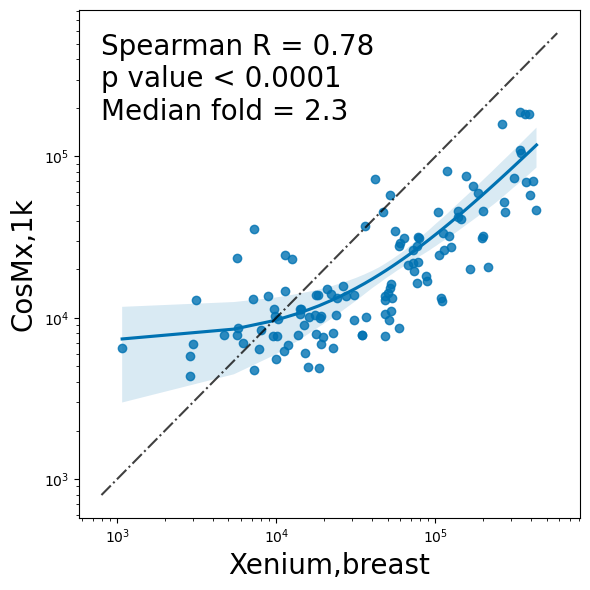

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MERSCOPE,breast CosMx,1k ['HTMA']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


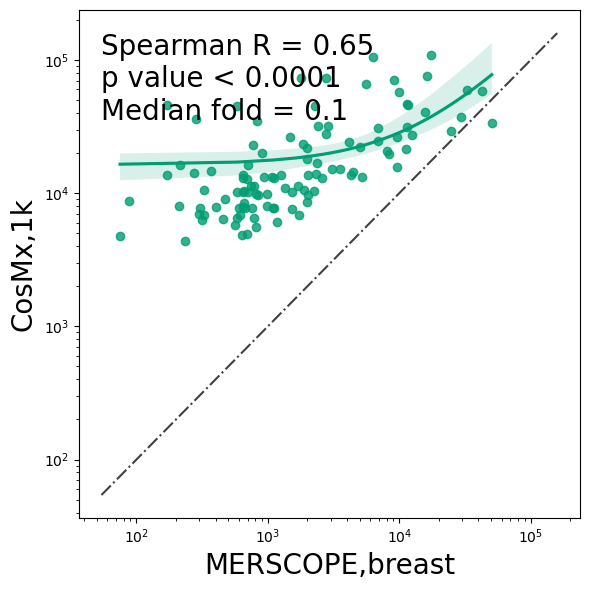

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Xenium,breast MERSCOPE,breast ['HTMA']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


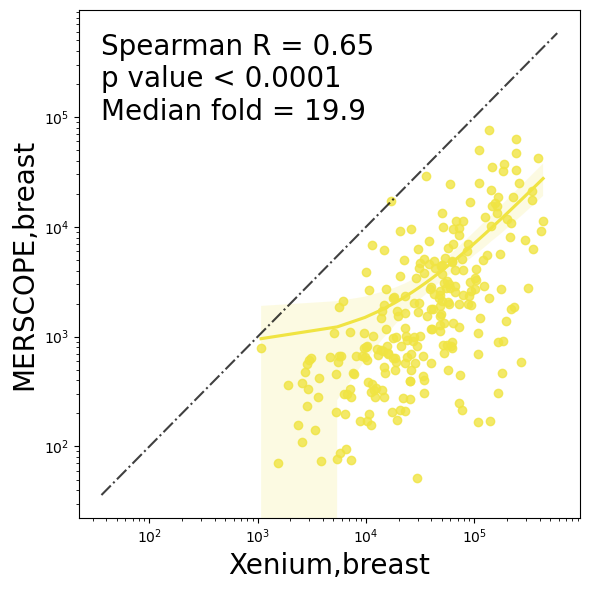

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Xenium,breast CosMx,1k ['TUMOR2']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


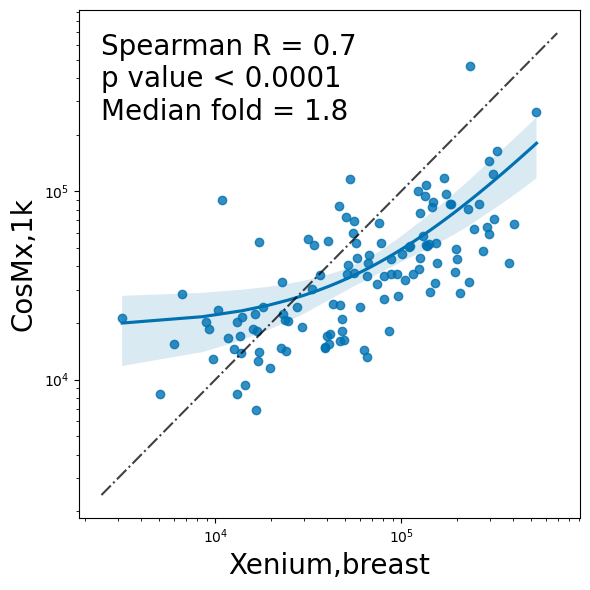

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MERSCOPE,breast CosMx,1k ['TUMOR2']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


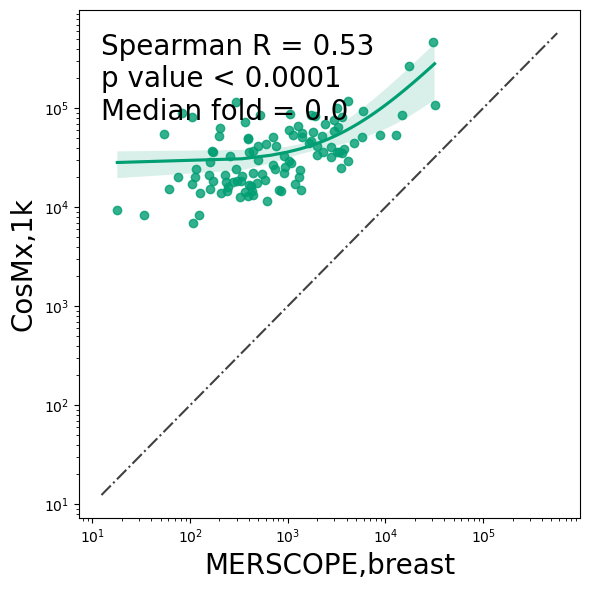

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Xenium,breast MERSCOPE,breast ['TUMOR2']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


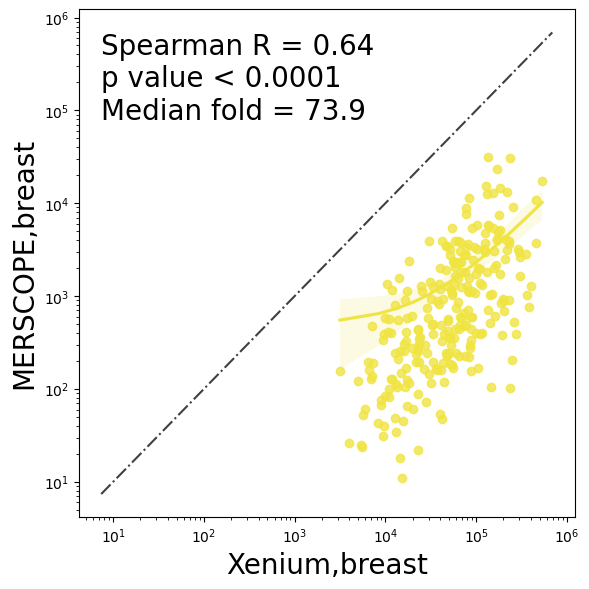

In [8]:
if not os.path.exists(f'{wd}/figures/Fig_2_Technical_Performance'):
    os.makedirs(f'{wd}/figures/Fig_2_Technical_Performance')


if year =='2023':

    for tmas in [['HTMA'], ['NORMAL']]:
        df_plot = df_m.loc[df_m['tma'].isin(tmas)]
        df_plot = df_plot.drop(['sample'], axis=1)
        df_plot = df_plot.groupby(['platform','panel','gene']).agg({metric: 'sum'}).reset_index()
        df_plot['platform_panel'] = df_plot.apply(lambda row: f"{row['platform']}_{row['panel']}", axis=1)
        df_plot = df_plot.pivot(index = 'gene', columns = 'platform_panel', values = 'count').reset_index()
        df_plot.columns = ['gene',
                    'CosMx,1k',
                    'MERSCOPE,breast', 
                    'MERSCOPE,lung',
                    'Xenium,breast',
                    'Xenium,lung',
                    'Xenium,multi-tissue']

        for count, platform_panel_pair in enumerate([('Xenium,breast','CosMx,1k'),
                                    ('Xenium,lung','CosMx,1k'),
                                    ('MERSCOPE,breast','CosMx,1k'),
                                    ('MERSCOPE,lung','CosMx,1k'),
                                    ('Xenium,breast','MERSCOPE,breast'),
                                    ('Xenium,lung','MERSCOPE,lung'),
                                    ('Xenium,multi-tissue','CosMx,1k')
                                    ]):
            color_index = int(np.floor(count/2+1))

            platform_panel_1 = platform_panel_pair[0]
            platform_panel_2 = platform_panel_pair[1]

            print(platform_panel_1, platform_panel_2, tmas)

            df_pair = df_plot[['gene', platform_panel_1, platform_panel_2]]
            df_pair = df_pair.reset_index(drop=True).dropna()

            df_pair['fold'] = df_pair.apply(lambda row: round(row[platform_panel_1] /row[platform_panel_2],1), axis=1)


            # Scatter plot
            plt.figure(figsize=(6, 6))
            sns.scatterplot(data=df_pair, x=platform_panel_1, y=platform_panel_2, color=list(CB_COLORS_5.values())[color_index],edgecolor='none',s=100)

            # # Annotate genes
            # for idx, row in df_pair.iterrows():
            #     plt.annotate(row['gene'], (row[platform_panel_1], row[platform_panel_2]), fontsize=5)

            # Fit a polynomial line
            degree = 1  # Degree of the polynomial
            x = df_pair[platform_panel_1]
            y = df_pair[platform_panel_2]
            coefficients = np.polyfit(x, y, degree)
            polynomial = np.poly1d(coefficients)
            x_poly = np.linspace(min(x), max(x), 100)
            y_poly = polynomial(x_poly)

            # Plot polynomial line
            plt.plot(x_poly, y_poly, label=f'{degree} degree polynomial fit', color='red')

            fontsize = 16

            # Log scale
            plt.xscale('log')
            plt.yscale('log')

            # 1:1 dashed line
            lims = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
            plt.plot(lims, lims, 'k-.', alpha=0.75)

            # Stats
            r, p = sp.stats.spearmanr(x, y)
            p = '< 0.0001' if p < 0.0001 else f"= {round(p, 7)}"
            plt.text(lims[0], lims[1]+3, f"Pearson R = {round(r,2)}\np value {p}\nMedian fold = {round(df_pair['fold'].median(), 1)}", fontsize=fontsize, verticalalignment='top')

            # Axes and labels
            plt.xlabel(platform_panel_1, fontsize=fontsize)
            plt.ylabel(platform_panel_2, fontsize=fontsize)
            plt.legend(loc='upper center', bbox_to_anchor=(0.4, 0.1), frameon=False, fontsize=fontsize)

            # Save and show the plot
            plt.tight_layout()
            plt.savefig(f"{wd}/figures/Fig_2_Technical_Performance/Main_Fig_2_ABC_{year}_{platform_panel_1}_vs_{platform_panel_2}_from_{'_and_'.join(tmas)}.png", bbox_inches='tight', transparent=True)
            # plt.savefig(f"{wd}/figures/Fig_2_Technical_Performance/Main_Fig_2_ABC_{year}_{platform_panel_1}_vs_{platform_panel_2}_from_{'_and_'.join(tmas)}.eps", bbox_inches='tight', transparent=True)
            plt.close()
            # plt.show()

elif year =='2024':

    for tmas in [['HTMA'], ['TUMOR2']]:
        df_plot = df_m.loc[df_m['tma'].isin(tmas)]
        df_plot = df_plot.drop(['sample'], axis=1)
        df_plot = df_plot.groupby(['platform','panel','gene']).agg({metric: 'sum'}).reset_index()
        df_plot['platform_panel'] = df_plot.apply(lambda row: f"{row['platform']}_{row['panel']}", axis=1)
        df_plot = df_plot.pivot(index = 'gene', columns = 'platform_panel', values = 'count').reset_index()
        df_plot.columns = ['gene',
                    'CosMx,1k',
                    'MERSCOPE,breast', 
                    'Xenium,breast']

        for count, platform_panel_pair in enumerate([
            ('Xenium,breast','CosMx,1k'),
            ('MERSCOPE,breast','CosMx,1k'),
            ('Xenium,breast','MERSCOPE,breast'),
            ]):

            color_index = count + 1
            
            platform_panel_1 = platform_panel_pair[0]
            platform_panel_2 = platform_panel_pair[1]

            print(platform_panel_1, platform_panel_2, tmas)

            df_pair = df_plot[['gene', platform_panel_1, platform_panel_2]]
            df_pair = df_pair.reset_index(drop=True).dropna()

            df_pair['fold'] = df_pair.apply(lambda row: round(row[platform_panel_1] /row[platform_panel_2],1), axis=1)

            # Scatter plot
            plt.figure(figsize=(6, 6))
            sns.regplot(data=df_pair, x=platform_panel_1, y=platform_panel_2, color=list(CB_COLORS_5.values())[color_index], robust=False)

            # # Annotate genes
            # for idx, row in df_pair.iterrows():
            #     plt.annotate(row['gene'], (row[platform_panel_1], row[platform_panel_2]), fontsize=5)

            # # Fit a polynomial line
            # degree = 1  # Degree of the polynomial
            x = df_pair[platform_panel_1]
            y = df_pair[platform_panel_2]
            # coefficients = np.polyfit(x, y, degree)
            # polynomial = np.poly1d(coefficients)
            # x_poly = np.linspace(min(x), max(x), 100)
            # y_poly = polynomial(x_poly)

            # # Plot polynomial line
            # plt.plot(x_poly, y_poly, label=f'{degree} degree polynomial fit', color='red')

            fontsize = 20

            # Log scale
            plt.xscale('log')
            plt.yscale('log')

            # 1:1 dashed line
            lims = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
            plt.plot(lims, lims, 'k-.', alpha=0.75)

            # Stats
            r, p = sp.stats.spearmanr(x, y)
            p = '< 0.0001' if p < 0.0001 else f"= {round(p, 7)}"
            plt.text(lims[0], lims[1]+3, f"Spearman R = {round(r,2)}\np value {p}\nMedian fold = {round(df_pair['fold'].median(), 1)}", fontsize=fontsize, verticalalignment='top')

            # Axes and labels
            plt.xlabel(platform_panel_1, fontsize=fontsize)
            plt.ylabel(platform_panel_2, fontsize=fontsize)
            plt.legend(loc='upper center', bbox_to_anchor=(0.4, 0.1), frameon=False, fontsize=fontsize)

            # Save and show the plot
            plt.tight_layout()
            plt.savefig(f"{wd}/figures/Fig_2_Technical_Performance/Main_Fig_2_ABC_{year}_{platform_panel_1}_vs_{platform_panel_2}_from_{'_and_'.join(tmas)}.png", bbox_inches='tight', transparent=True)
            plt.savefig(f"{wd}/figures/Fig_2_Technical_Performance/Main_Fig_2_ABC_{year}_{platform_panel_1}_vs_{platform_panel_2}_from_{'_and_'.join(tmas)}.eps", bbox_inches='tight', transparent=True)
            # plt.close()
            plt.show()

# Core to core reproducibility

105 106
sample: xenium_breast_htma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


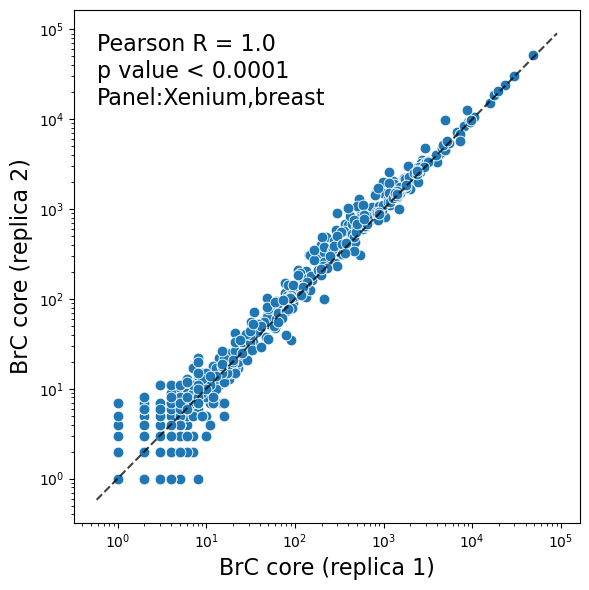

sample: xenium_panhuman_htma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


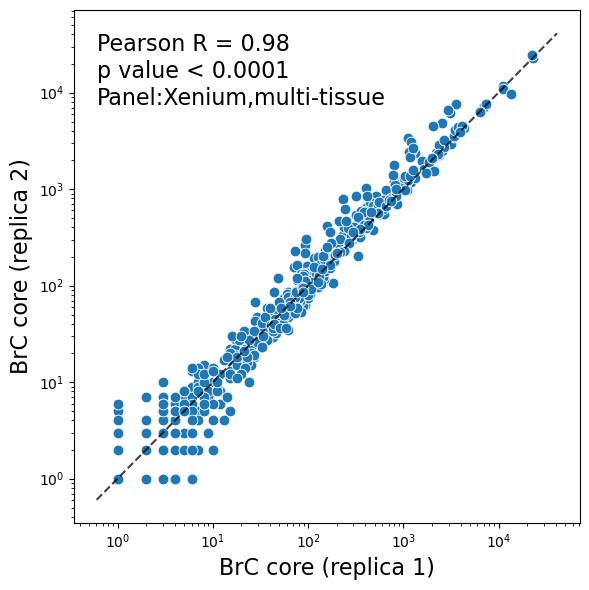

sample: xenium_lung_htma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


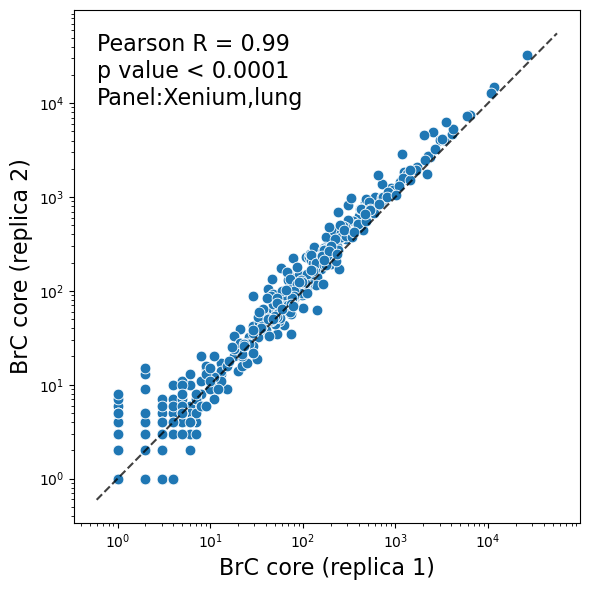

sample: merscope_breast_htma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


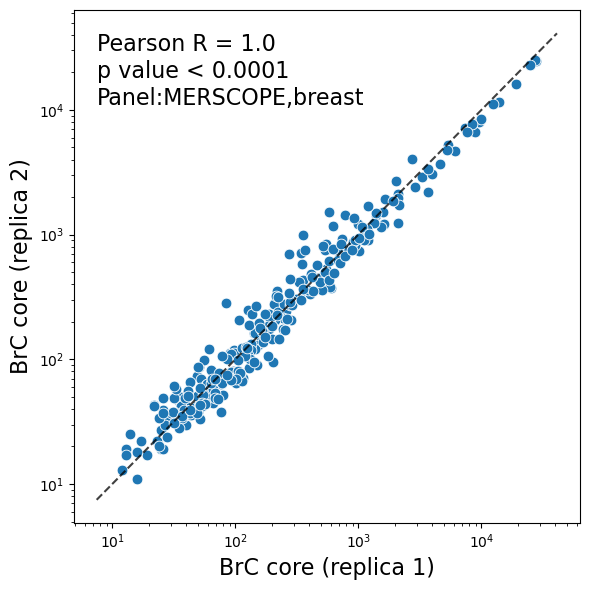

sample: merscope_lung_htma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


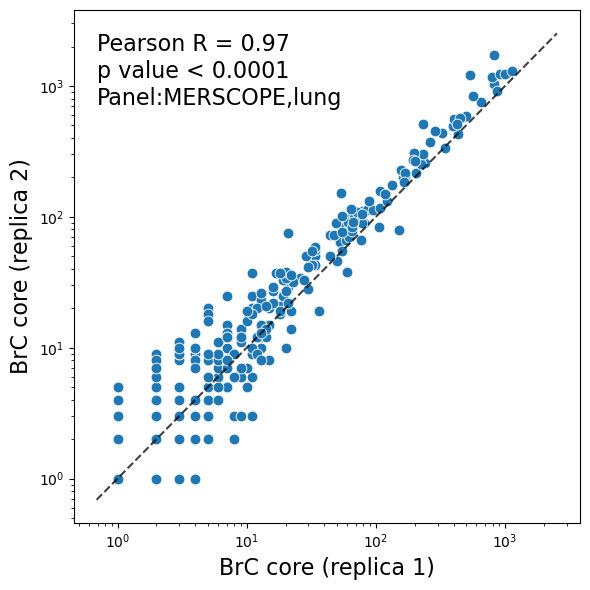

sample: cosmx_multitissue_htma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


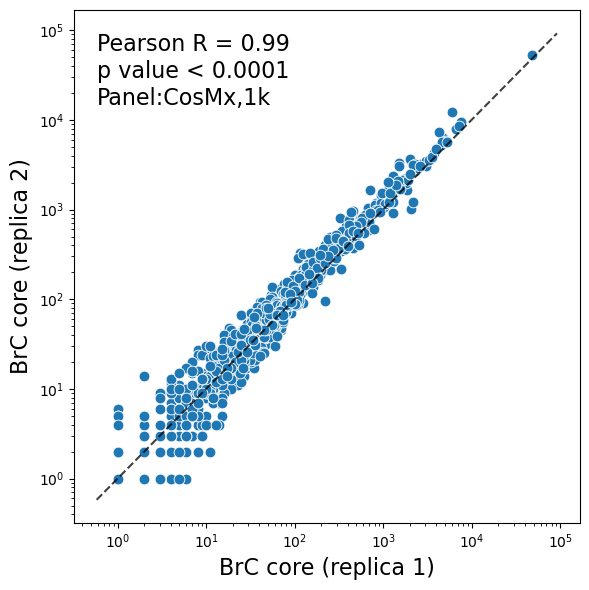

sample: 2024_xenium_breast_htma
sample: 2024_merscope_breast_htma
sample: 2024_cosmx_multitissue_htma


In [6]:
if not os.path.exists(f'{wd}/figures/Fig_1'):
    os.makedirs(f'{wd}/figures/Fig_1')

rs = []
sams = []
core_ps = []

for core_pair in [[105, 106]]:
    core_1 = core_pair[0]
    core_2 = core_pair[1]
    print (core_1, core_2)
    
    metric = f'count'
    df_m = pd.DataFrame()
    # for sample in ['xenium_lung_htma','merscope_breast_htma','cosmx_multitissue_htma']:
    for sample in SAMPLES[::2]:

        try:
            print (f'sample: {sample}')
            df_t = pd.read_csv(f'{wd}/data/gene_level_csv/gene_level_csv_{sample}.csv')
            df_t = correct_tissue_names(sample, df_t)
            # Reindex normal tissue cores 
            df_t.core = df_t.core + 200 if 'normal' in sample else df_t.core
            platform_panel = CORRECT_PLATFORM_PANEL['_'.join(sample.split('_')[:2])]
            df_core_1 = df_t.loc[df_t['core']==core_1][['gene','tissue_type','count']]
            df_core_1 = df_core_1.rename(columns={'count':f'Core_{core_1}'})
            df_core_2 = df_t.loc[df_t['core']==core_2][['gene','count']]
            df_core_2 = df_core_2.rename(columns={'count':f'Core_{core_2}'})
            df_core_pair = pd.merge(df_core_1, df_core_2, on='gene', how='inner')
            df_core_pair['fold'] = df_core_pair.apply(lambda row: round(row[f'Core_{core_1}'] /row[f'Core_{core_2}']), axis=1)

            # Scatter plot
            plt.figure(figsize=(6, 6))
            sns.scatterplot(data=df_core_pair, x=f'Core_{core_1}', y=f'Core_{core_2}', s=60)

            r, p = sp.stats.pearsonr(x=df_core_pair[f'Core_{core_1}'], y=df_core_pair[f'Core_{core_2}'])
            p = '< 0.0001' if p < 0.0001 else round(p, 7)

            # Log scale
            plt.xscale('log')
            plt.yscale('log')

            lims1 = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
            lims2 = [np.max([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
            plt.plot(lims1, lims1, 'k--', alpha=0.75)
            fontsize = 16
            plt.text(lims1[0], lims1[1], f"Pearson R = {round(r,2)}\np value {p}\nPanel:{platform_panel}", fontsize=fontsize, verticalalignment='top')
            plt.xlabel(f'BrC core (replica 1)', fontsize=fontsize)
            plt.ylabel(f'BrC core (replica 2)', fontsize=fontsize)
            plt.tight_layout()
            plt.savefig(f'{wd}/figures/Fig_1/supp_1_Core_{core_1}_vs_Core_{core_2}_reproducibility_{platform_panel}.png', bbox_inches='tight')
            plt.savefig(f'{wd}/figures/Fig_1/supp_1_Core_{core_1}_vs_Core_{core_2}_reproducibility_{platform_panel}.eps', bbox_inches='tight')
            plt.show()

            rs.append(round(r,3))
            core_ps.append(f'Core {str(core_1).zfill(3)} vs. {str(core_2).zfill(3)}')
            sams.append(sample.upper())
        except:
            continue

In [7]:
rs = []
sams = []
core_ps = []

for core_pair in [[75, 76],
                [88, 89],
                [95, 96],
                [105, 106],
                [109, 110],
                [111, 112],
                [115, 116],
                [131, 132],
                [151, 152],
                [156, 157],
                [158, 159],
                [165, 166],
                [168, 169]]:
    core_1 = core_pair[0]
    core_2 = core_pair[1]
    print (core_1, core_2)


    metric = f'count'
    df_m = pd.DataFrame()
    # for sample in ['xenium_lung_htma','merscope_breast_htma','cosmx_multitissue_htma']:
    for sample in SAMPLES[::2]:

        try:
            print (f'sample: {sample}')
            df_t = pd.read_csv(f'{wd}/data/gene_level_csv/gene_level_csv_{sample}.csv')
            df_t = correct_tissue_names(sample, df_t)
            # Reindex normal tissue cores 
            df_t['core'] += (300 if 'tumor2' in sample else 0) + (200 if 'normal' in sample else 0)
            # Consolidate tissue type

            platform_panel = CORRECT_PLATFORM_PANEL['_'.join(sample.split('_')[:2])]

            df_core_1 = df_t.loc[df_t['core']==core_1][['gene','tissue_type','count']]
            df_core_1 = df_core_1.rename(columns={'count':f'Core_{core_1}'})
            df_core_2 = df_t.loc[df_t['core']==core_2][['gene','count']]
            df_core_2 = df_core_2.rename(columns={'count':f'Core_{core_2}'})
            df_core_pair = pd.merge(df_core_1, df_core_2, on='gene', how='inner')
            df_core_pair['fold'] = df_core_pair.apply(lambda row: round(row[f'Core_{core_1}'] /row[f'Core_{core_2}']), axis=1)
            r, p = sp.stats.pearsonr(x=df_core_pair[f'Core_{core_1}'], y=df_core_pair[f'Core_{core_2}'])
            p = '< 0.0001' if p < 0.0001 else round(p, 7)
            rs.append(round(r,3))
            core_ps.append(f'Core {str(core_1).zfill(3)} vs. {str(core_2).zfill(3)}')
            sams.append(sample.upper())
        except:
            continue


df = pd.DataFrame({'Sample':sams, 'Core Pair':core_ps, 'Correlation':rs})
df['Platform_Panel'] = df['Sample'].apply(lambda x: f"{x.split('_')[0]}_{x.split('_')[1]}")
df = correct_platform_panel(df, 'Platform_Panel')
df_plot = df.copy()
df_plot = df_plot.sort_values(by=['Core Pair'])
df_plot = df_plot.pivot(index='Platform_Panel', columns='Core Pair', values='Correlation')

75 76
sample: xenium_breast_htma
sample: xenium_panhuman_htma
sample: xenium_lung_htma
sample: merscope_breast_htma
sample: merscope_lung_htma
sample: cosmx_multitissue_htma
sample: 2024_xenium_breast_htma
sample: 2024_merscope_breast_htma
sample: 2024_cosmx_multitissue_htma
88 89
sample: xenium_breast_htma
sample: xenium_panhuman_htma
sample: xenium_lung_htma
sample: merscope_breast_htma
sample: merscope_lung_htma
sample: cosmx_multitissue_htma
sample: 2024_xenium_breast_htma
sample: 2024_merscope_breast_htma
sample: 2024_cosmx_multitissue_htma
95 96
sample: xenium_breast_htma
sample: xenium_panhuman_htma
sample: xenium_lung_htma
sample: merscope_breast_htma
sample: merscope_lung_htma
sample: cosmx_multitissue_htma
sample: 2024_xenium_breast_htma
sample: 2024_merscope_breast_htma
sample: 2024_cosmx_multitissue_htma
105 106
sample: xenium_breast_htma
sample: xenium_panhuman_htma
sample: xenium_lung_htma
sample: merscope_breast_htma
sample: merscope_lung_htma
sample: cosmx_multitissue_h

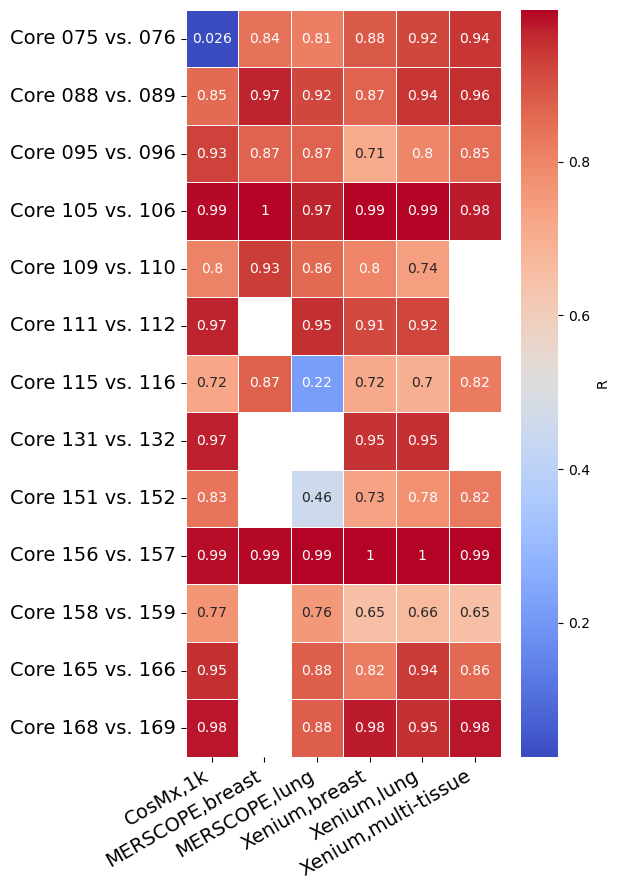

In [8]:
# Create the heatmap with annotations
plt.figure(figsize=(6, 9))
g = sns.heatmap(df_plot.T, annot=True, cmap='coolwarm', linewidths=0.5,cbar_kws={'label': 'R'})
cbar = g.collections[0].colorbar
cbar.ax.set_position([0.6, 0.1, 0.1, 0.77]) #
# cbar.ax.set_ylabel(f"{' '.join(metric.split('_')).capitalize()} per cell across tissue types by platform x panel", rotation=270, labelpad=20, fontsize=16)
plt.xlabel('')
plt.ylabel('')

fontsize=14
xlabels = g.get_xticklabels()
g.set_xticklabels(xlabels, fontsize=fontsize, rotation=30, ha="right")

ylabels = g.get_yticklabels()
g.set_yticklabels(ylabels, fontsize=fontsize)

plt.tight_layout()
plt.savefig(f'{wd}/figures/Fig_1/supp_1_heatmap_of_core_reproducibility.png', dpi=250)
plt.savefig(f'{wd}/figures/Fig_1/supp_1_heatmap_of_core_reproducibility.eps', dpi=250)
plt.show()

In [24]:
df_m['sample'] = df_m['sample'].apply(lambda x: x.replace('htma','tumor_tma_1'))

,core,gene,tissue_type,count,code_type,sample,platform,panel
2486,103,ABCC11,BrC,9,gene,xenium_breast_htma,XENIUM,breast
2487,103,ACTA2,BrC,2795,gene,xenium_breast_htma,XENIUM,breast
2488,103,ACTG2,BrC,1864,gene,xenium_breast_htma,XENIUM,breast
2489,103,ADAM9,BrC,2087,gene,xenium_breast_htma,XENIUM,breast
2490,103,ADGRE5,BrC,844,gene,xenium_breast_htma,XENIUM,breast
...,...,...,...,...,...,...,...,...
173207,99,XKR4,BrC,127,gene,2024_cosmx_multitissue_htma,COSMX,multitissue
173208,99,YBX3,BrC,12902,gene,2024_cosmx_multitissue_htma,COSMX,multitissue
173209,99,YES1,BrC,1744,gene,2024_cosmx_multitissue_htma,COSMX,multitissue
173210,99,ZBTB16,BrC,200,gene,2024_cosmx_multitissue_htma,COSMX,multitissue


# Real sample to sample reproducibility

sample: xenium_breast_htma
sample: xenium_panhuman_htma
sample: xenium_lung_htma
sample: merscope_breast_htma
sample: merscope_lung_htma
sample: cosmx_multitissue_htma
sample: 2024_xenium_breast_htma
sample: 2024_merscope_breast_htma
sample: 2024_cosmx_multitissue_htma
xenium_breast_tumor_tma_1 2024_xenium_breast_tumor_tma_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


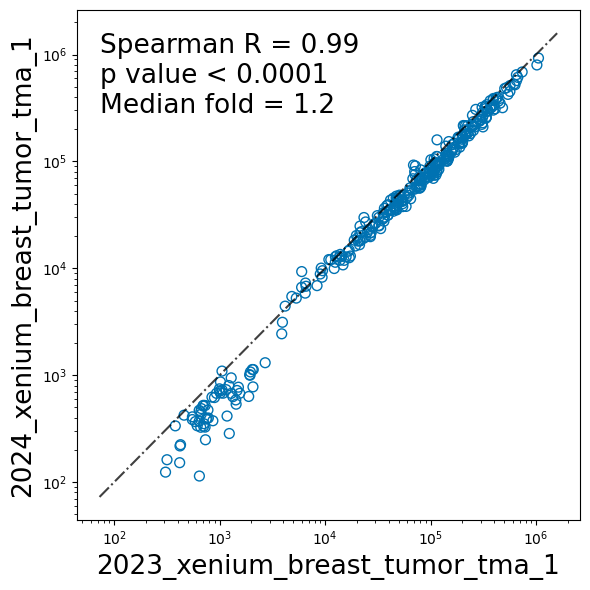

cosmx_multitissue_tumor_tma_1 2024_cosmx_multitissue_tumor_tma_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


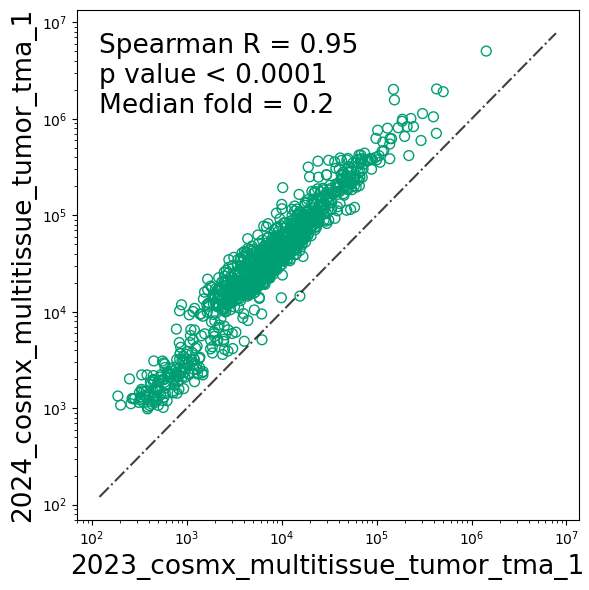

merscope_breast_tumor_tma_1 2024_merscope_breast_tumor_tma_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


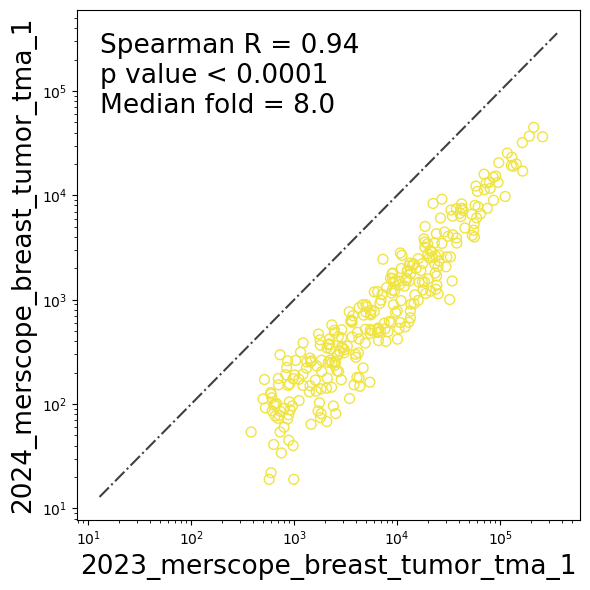

In [58]:
if not os.path.exists(f'{wd}/figures/Fig_2_Technical_Performance'):
    os.makedirs(f'{wd}/figures/Fig_2_Technical_Performance')

metric = f'count'
df_m = pd.DataFrame()
for sample in SAMPLES:
    if 'htma' in sample:
        print (f'sample: {sample}')
        df_t = pd.read_csv(f'{wd}/data/gene_level_csv/gene_level_csv_{sample}.csv')
        df_t = correct_tissue_names(sample, df_t)
        df_t['core'] += (300 if 'tumor2' in sample else 0) + (200 if 'normal' in sample else 0)
        df_t['sample'] = sample

        matching_cores = xenium_breast_htma_matching_cores if 'xenium' in sample else merscope_breast_htma_matching_cores if 'merscope' in sample else cosmx_multitissue_htma_matching_cores if 'cosmx' in sample else None
        df_t = df_t.loc[df_t['core'].isin(matching_cores)]
        df_m = pd.concat([df_m,df_t])
    
df_m['platform'] = df_m['sample'].apply(lambda x: name_parser(x)['platform'].upper())
df_m['panel'] = df_m['sample'].apply(lambda x: name_parser(x)['panel'])
df_m['sample'] = df_m['sample'].apply(lambda x: x.replace('htma','tumor_tma_1'))
df_plot = df_m.copy()
df_plot = df_plot.groupby(['sample','gene']).agg({metric: 'sum'}).reset_index()
df_plot = df_plot.pivot(index = 'gene', columns = 'sample', values = 'count').reset_index()

for count, sample_pair in enumerate([
    ('xenium_breast_tumor_tma_1','2024_xenium_breast_tumor_tma_1'),
    ('cosmx_multitissue_tumor_tma_1','2024_cosmx_multitissue_tumor_tma_1'),
    ('merscope_breast_tumor_tma_1','2024_merscope_breast_tumor_tma_1')
    ]):

    color_index = count + 1

    sample_1 = sample_pair[0]
    sample_2 = sample_pair[1]

    print(sample_1, sample_2)

    df_pair = df_plot[['gene', sample_1, sample_2]]
    df_pair = df_pair.reset_index(drop=True).dropna()

    df_pair['fold'] = df_pair.apply(lambda row: round(row[sample_1] /row[sample_2],1), axis=1)

    # Scatter plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df_pair, x=sample_1, y=sample_2,facecolor='none', edgecolor=list(CB_COLORS_5.values())[color_index],lw=1, s=50)

    # # Annotate genes
    # for idx, row in df_pair.iterrows():
    #     plt.annotate(row['gene'], (row[platform_panel_1], row[platform_panel_2]), fontsize=5)

    r, p = sp.stats.spearmanr(df_pair[f"{sample_1}"], df_pair[f"{sample_2}"])
    p = '< 0.0001' if p < 0.0001 else f"= {round(p, 7)}"

    # Log scale
    plt.xscale('log')
    plt.yscale('log')

    # 1:1 dashed line
    lims1 = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
    lims2 = [np.max([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
    plt.plot(lims1, lims1, 'k-.', alpha=0.75)
    fontsize = 19
    plt.text(lims1[0], lims1[1], f"Spearman R = {round(r,2)}\np value {p}\nMedian fold = {round(df_pair['fold'].median(), 1)}", fontsize=fontsize, verticalalignment='top')
    # plt.text(lims2[0] * 0.2, lims2[1], f"x=y line", fontsize=fontsize, verticalalignment='top')
    plt.xlabel(f"2023_{sample_1}", fontsize=fontsize)
    plt.ylabel(sample_2, fontsize=fontsize)
    plt.tight_layout()
    plt.savefig(f"{wd}/figures/Fig_1/Supp_Fig_1_{sample_1}_vs_{sample_2}_2024.png", bbox_inches='tight', transparent=True)
    plt.savefig(f"{wd}/figures/Fig_1/Supp_Fig_1_{sample_1}_vs_{sample_2}_2024.eps", bbox_inches='tight', transparent=True)
    # plt.close()
    plt.show()


## Real core to core reproducibility

['xenium_breast_htma', '2024_xenium_breast_htma']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


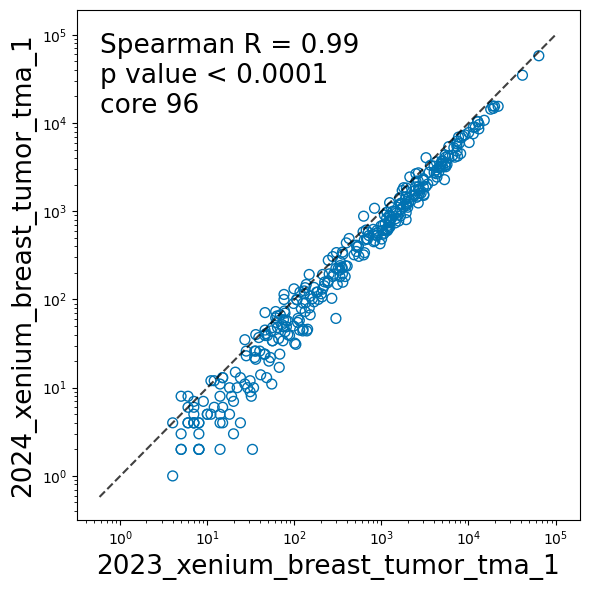

['cosmx_multitissue_htma', '2024_cosmx_multitissue_htma']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


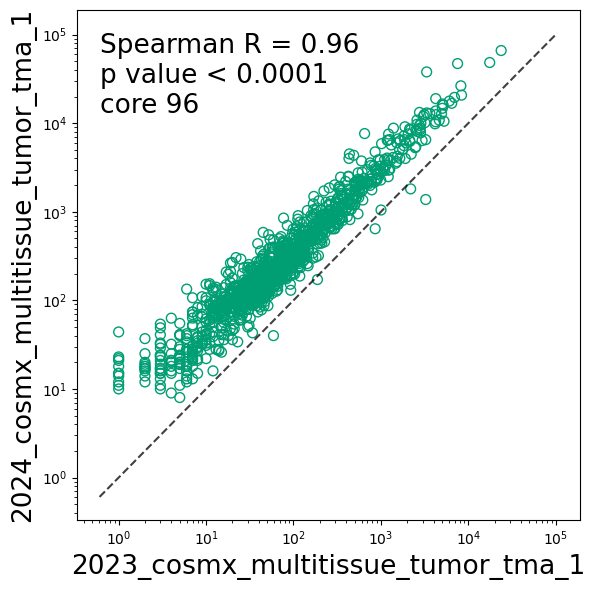

['merscope_breast_htma', '2024_merscope_breast_htma']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


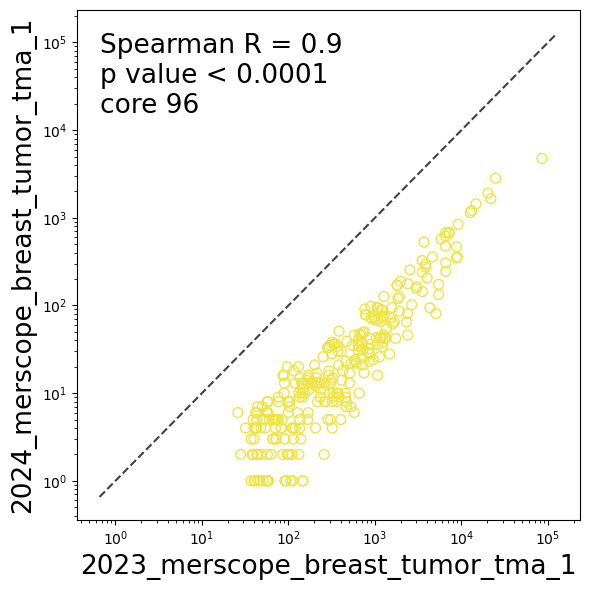

In [54]:
if not os.path.exists(f'{wd}/figures/Fig_1'):
    os.makedirs(f'{wd}/figures/Fig_1')

rs = []
cores = []
core_ps = []
distances = []

for count, sample_pair in enumerate([
    ['xenium_breast_htma','2024_xenium_breast_htma'],
    ['cosmx_multitissue_htma','2024_cosmx_multitissue_htma'],
    ['merscope_breast_htma','2024_merscope_breast_htma']
    ]):
    

    color_index = count + 1
    print (sample_pair)
    metric = f'count'
    df_m = {}

    for sample in sample_pair:
        df_t = pd.read_csv(f'{wd}/data/gene_level_csv/gene_level_csv_{sample}.csv')
        df_t = correct_tissue_names(sample, df_t)
        df_t['core'] += (300 if 'tumor2' in sample else 0) + (200 if 'normal' in sample else 0)
        df_sample = df_t[['gene','tissue_type','count','core']]
        df_sample = df_sample.rename(columns={'count':f'{sample}'})
        df_m[sample] = df_sample

    df_sample_pair = pd.merge(df_m[sample_pair[0]], df_m[sample_pair[1]], on=['core','gene','tissue_type'], how='inner')
    # df_sample_pair['fold'] = df_sample_pair.apply(lambda row: round(row[sample_pair[0]] /row[sample_pair[0]],2), axis=1)
    df_sample_pair['fold'] = df_sample_pair.apply(lambda row: row[sample_pair[0]] /row[sample_pair[0]], axis=1)

    for core in df_sample_pair.core.unique():
        df_core_plot = df_sample_pair.loc[df_sample_pair['core']==core]
        r, p = sp.stats.spearmanr(df_core_plot[sample_pair[0]], df_core_plot[sample_pair[1]])
        p = '< 0.0001' if p < 0.0001 else round(p, 7)

        # Calculate the perpendicular distances
        df_core_plot['distance'] = np.abs(df_core_plot[sample_pair[0]] - df_core_plot[sample_pair[1]]) / np.sqrt(2)

        # Calculate the overall average distance or any other statistical summary
        mean_distance = df_core_plot['distance'].mean()

        if core in [96]:
            # Scatter plot
            plt.figure(figsize=(6, 6))
            sns.scatterplot(data=df_core_plot, x=sample_pair[0], y=sample_pair[1], facecolor='none', edgecolor=list(CB_COLORS_5.values())[color_index],lw=1, s=50)
            # Log scale
            plt.xscale('log')
            plt.yscale('log')
            lims1 = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
            lims2 = [np.max([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
            plt.plot(lims1, lims1, 'k--', alpha=0.75)
            fontsize = 19
            plt.text(lims1[0], lims1[1], f"Spearman R = {round(r,2)}\np value {p}\ncore {core}", fontsize=fontsize, verticalalignment='top')
            plt.xlabel(f"2023_{sample_pair[0].replace('htma','tumor_tma_1')}", fontsize=fontsize)
            plt.ylabel(sample_pair[1].replace('htma','tumor_tma_1'), fontsize=fontsize)
            plt.tight_layout()
            plt.savefig(f"{wd}/figures/Fig_1/supp_1_Core_{core}_{sample_pair[0].split('_')[0]}_reproducibility_2024.png", bbox_inches='tight')
            plt.savefig(f"{wd}/figures/Fig_1/supp_1_Core_{core}_{sample_pair[0].split('_')[0]}_reproducibility_2024.eps", bbox_inches='tight')
            plt.show()
            plt.close()

        rs.append(round(r,3))
        core_ps.append(f'{sample_pair[0]} vs. {sample_pair[1]}')
        cores.append(str(core))
        distances.append(mean_distance)


In [55]:
# Select cores that have matching morphology
df_stats = pd.DataFrame({'pair':core_ps, 'core':cores, 'r':rs, 'distance':distances})
df_stats['platform'] = df_stats['pair'].apply(lambda x: x.split('_')[0])
df_stats['platform'] = df_stats['platform'].apply(lambda x: {'xenium':'Xenium','merscope':'MERSCOPE','cosmx':'CosMx'}[x])
df_stats['core'] = df_stats['core'].astype(int)

filtered_df = df_stats.loc[
    ((df_stats['platform'] == 'Xenium') & (df_stats['core'].isin(xenium_breast_htma_matching_cores))) |
    ((df_stats['platform'] == 'MERSCOPE') & (df_stats['core'].isin(merscope_breast_htma_matching_cores))) |
    ((df_stats['platform'] == 'CosMx') & (df_stats['core'].isin(cosmx_multitissue_htma_matching_cores)))
]


In [59]:
# Assuming df_new is your DataFrame and it's already defined
fig = go.Figure()

width=600
height=400
fontsize = 13

# Extract unique platforms to plot each as a separate box
platforms = filtered_df['platform'].unique()
for platform in platforms:
    data = filtered_df[filtered_df['platform'] == platform]['r']
    fig.add_trace(go.Box(
        y=data,
        name=platform,
        boxpoints='all',  # add all points
        jitter=0.3,  # adjust jitter to spread points horizontally
        pointpos=0,  # adjust position relative to the box (-2 to 2)
        marker_color=sample_color[platform.lower()]
    ))

# Set box plot settings
fig.update_traces(quartilemethod="exclusive")

# Customize axes and layout
fig.update_xaxes(title_text="", tickfont=dict(size=fontsize+2), showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title_text="Spearman R", title_font=dict(size=fontsize+2), showline=True, linewidth=2, linecolor='black')
fig.update_layout(
    width=width,
    height=height,
    title_text="Core level gene-by-gene correlation coefficient<br>2023 vs.2024",
    showlegend=False,
    title_font=dict(size=fontsize+2),
    legend_font=dict(size=fontsize),
    title_x=0.5,
    title_y=0.8,
    legend=dict(
        orientation="h",
        yanchor="bottom", 
        y=1.1,
        xanchor="center",
        x=0.5
    ),
    font=dict(color='black'),
    plot_bgcolor= "rgba(0, 0, 0, 0)"
)

# Show the plot
fig.show()
pio.write_image(fig, f'{wd}/figures/Fig_1/supp_1_core_reproducibility_spearmanr_2024.png',scale=6, width=width, height=height)
pio.write_image(fig, f'{wd}/figures/Fig_1/supp_1_core_reproducibility_2024.eps',scale=4, width=width, height=height)


In [60]:


# Assuming df_new is your DataFrame and it's already defined
fig = go.Figure()


# Extract unique platforms to plot each as a separate box
platforms = filtered_df['platform'].unique()
for platform in platforms:
    data = filtered_df[filtered_df['platform'] == platform]['distance']
    fig.add_trace(go.Box(
        y=data,
        name=platform,
        boxpoints='all',  # add all points
        jitter=0.3,  # adjust jitter to spread points horizontally
        pointpos=0,  # adjust position relative to the box (-2 to 2)
        marker_color=sample_color[platform.lower()]
    ))

# Set box plot settings
fig.update_traces(quartilemethod="exclusive")

# Customize axes and layout
fig.update_xaxes(title_text="", tickfont=dict(size=fontsize+2), showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title_text="Distance", title_font=dict(size=fontsize+2), showline=True, linewidth=2, linecolor='black')
fig.update_layout(
    width=width,
    height=height,
    title_text="Core level gene-by-gene distance to 1:1 line<br>2023 vs.2024",
    showlegend=False,
    title_font=dict(size=fontsize+2),
    legend_font=dict(size=fontsize),
    title_x=0.5,
    title_y=0.8,
    legend=dict(
        orientation="h",
        yanchor="bottom", 
        y=1.1,
        xanchor="center",
        x=0.5
    ),
    font=dict(color='black'),
    plot_bgcolor= "rgba(0, 0, 0, 0)"
)

# Show the plot
fig.show()
pio.write_image(fig, f'{wd}/figures/Fig_1/supp_1_core_reproducibility_distance_2024.png',scale=6, width=width, height=height)
pio.write_image(fig, f'{wd}/figures/Fig_1/supp_1_core_reproducibility_2024.eps',scale=4, width=width, height=height)
